# FCIM.M.IA - Artificial Intelligence

> **Lab 3:** Chess Engine \\
> **Performed by:** Astafi Valentina, group TI-231M \\
> **Verified by:** Mihail Gavrilita, asist. univ.

## Imports and Utils

In [3]:
from __future__ import annotations
from abc import ABC
from math import inf
import chess
import time
from chess.engine import PlayResult
import chess.polyglot
import random
from typing import Any, Union
import logging
import numpy as np
from enum import Enum
from IPython.display import Image

## Task 1 -- Implement the Minimax algorithm with Alpha-Beta Prunning.

In [ ]:
    def run_minimax(self, board, depth, alpha, beta, is_maximizing_phase):
        if depth == 0 or board.is_game_over():
            return self.evaluate_board(board)

        moves_options = self.find_list_of_moves(board)
        if not moves_options:
            moves_options = board.legal_moves
        # maximizing funtion
        if is_maximizing_phase:
            max_score = -inf
            for move in moves_options:
                board.push(move)
                latest_score = self.run_minimax(board, depth - 1, alpha, beta, False)
                max_score = max(max_score, latest_score)
                board.pop()
                alpha = max(alpha, max_score)
                # alpha-beta pruning: do not analyze further if not needed
                if alpha >= beta:
                    return max_score
            return max_score
        # minimizing part:
        else:
            min_score = inf
            for move in moves_options:
                board.push(move)
                latest_score = self.run_minimax(board, depth - 1, alpha, beta, True)
                min_score = min(min_score, latest_score)
                board.pop()
                beta = min(beta, min_score)
                # alpha-beta pruning: do not analyze further if not needed
                if alpha >= beta:
                    return min_score
            return min_score

In [ ]:
    # simple definition for each piece's value
    @staticmethod
    def get_piece_value(piece):
        piece = str(piece).upper()
        if piece == "P":
            return 1
        elif piece == "N" or piece == "B":
            return 3
        elif piece == "R":
            return 5
        elif piece == "Q":
            return 9
        else:
            return 0

    # the value each piece brings according to the colour and position it is in
    @staticmethod
    def get_position_value(piece, is_self_color, row, column):
        piece = str(piece).upper()
        if piece == "P":
            return FigurePositionValue.pawn_position_value()[row, column] if is_self_color else \
                np.flip(FigurePositionValue.pawn_position_value(), axis=None)[row, column]
        elif piece == "N":
            return FigurePositionValue.knight_position_value()[row, column]
        elif piece == "B":
            return FigurePositionValue.bishop_position_value()[row, column] if is_self_color else \
                np.flip(FigurePositionValue.bishop_position_value(), axis=None)[row, column]
        elif piece == "R":
            return FigurePositionValue.rook_position_value()[row, column] if is_self_color else \
                np.flip(FigurePositionValue.rook_position_value(), axis=None)[row, column]
        elif piece == "Q":
            return FigurePositionValue.queen_position_value()[row, column]
        else:
            return FigurePositionValue.king_position_value()[row, column]

## Task 2 -- Implement an improved scoring (evaluation) method for Minimax.

In [ ]:
def evaluate_board(self, board):
        score = 0
        for square in chess.SQUARES:
            piece = board.piece_at(square)
            if piece is not None:
                # simple score evaluation based on the position of each piece
                if piece.color == chess.WHITE:
                    score += (self.get_piece_value(piece) + self.get_position_value(piece, True, chess.square_file(square), chess.square_rank(square)))
                else:
                    score -= (self.get_piece_value(piece) + self.get_position_value(piece, False, chess.square_file(square), chess.square_rank(square)))
                    # evaluation of the possibility to do castling
        if board.has_kingside_castling_rights(chess.WHITE):
            score += 0.2
        if board.has_kingside_castling_rights(chess.BLACK):
            score -= 0.2

        # evaluation of king safety based on the number of safe squares round the king
        white_king_safety = sum(1 for sq in board.attacks(board.king(chess.WHITE)) if board.piece_at(sq) is None)
        black_king_safety = sum(1 for sq in board.attacks(board.king(chess.BLACK)) if board.piece_at(sq) is None)
        king_safety = white_king_safety - black_king_safety
        score += king_safety * 0.05

        return score

## Task 3 -- Add  improvements to the Minimax algorithm

In [ ]:
    def use_progressive_deepening(self, board, max_depth, time_limit):
        current_score = -inf
        for depth in range(1, max_depth + 1):
            start_time = time.time()
            current_score = self.find_best_move(board=board, depth=depth)
            if time.time() - start_time >= time_limit:
                break
        return current_score

## Task 4 -- Deploy your solution on licess.org. 

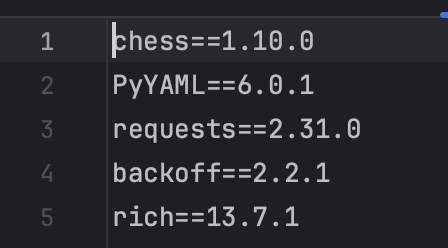

In [10]:
Image(filename="./results/1.png")

In [9]:
Image(filename="./results/2.png")

In [11]:
Image(filename="./results/3.png")

In [6]:
Image(filename="./results/4.png")

In [5]:
Image(filename="./results/5.png")

## Conclusions:

Lab work on the chess engine helped me understand the Minimax algorithm, which allowed the chess engine to evaluate potential moves by simulating possible future outcomes.
Minimax algorithm improvement with alpha-beta pruning optimized scenarios.
The development of an evaluation function that takes into account various chess strategies, such as king safety, mobility and pawn structure, illustrated the complexity of the decision-making process.
In conclusion, this laboratory work not only allowed me to apply theoretical knowledge in a practical setting, but also challenged me to think critically and think about how to solve complex problems.

## Bibliography:

[1] How to Play Chess. Available: https://www.chess.com/learn-how-to-play-chess
[2] Alpha–beta pruning. Available: https://en.wikipedia.org/wiki/Alpha%E2%80%93beta_pruning
[3] Minimax Algorithm in Chess. Available: https://www.idtech.com/blog/minimax-algorithm-in-chess-checkers-tic-tac-toe
Lichess-bot. Available: https://github.com/lichess-bot-devs/lichess-bot
[4] PolyChess. Available: https://github.com/mphuget/polychess/tree/master
[5] How to create a Lichess OAuth token. Available: https://github.com/lichess-bot-devs/lichess-bot/wiki/How-to-create-a-Lichess-OAuth-token